In [2]:
import numpy as np
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Material properties
E = 2e5 # Young's modulus (N/mm^2)
A = 50 # Cross-sectional area (mm^2)

# Load vector
F = np.array([0, 0, 0, -3e3, 0, 0])

# Number of elements and nodes
ne = 3
L = 800 / ne
nodes = np.linspace(0, 800, ne+1)

# Function to calculate element stiffness matrix
def element_stiffness_matrix(E, A, L):
    k = np.array([[E*A/L, -E*A/L], [-E*A/L, E*A/L]])
    return k

# Function to assemble global stiffness matrix
def global_stiffness_matrix(ne, nodes, element_matrices):
    K = np.zeros((len(nodes), len(nodes)))
    for i in range(ne):
        k = element_matrices[i]
        K[i:i+2, i:i+2] += k
    return sp.csc_matrix(K)

# Function to find deformation or elongation
def deformation(ne, nodes, element_matrices, F):
    K = global_stiffness_matrix(ne, nodes, element_matrices)
    u = spsolve(K.tocsc(), F.reshape(-1, 1))
    x = nodes
    return x, u

# Calculate element stiffness matrices
element_matrices = [element_stiffness_matrix(E, A, L) for i in range(ne)]

# Calculate global stiffness matrix and deformation or elongation
x, u = deformation(ne, nodes, element_matrices, F)

# Plot deformation or elongation
plt.plot(x, u)
plt.xlabel('x (mm)')
plt.ylabel('u (m)')
plt.title('Deformation of Steel Bar')

# Option to increase the number of elements in finite element code
ne_new = int(input("Enter the number of elements: "))
L_new = 800 / ne_new
nodes_new = np.linspace(0, 800, ne_new+1)
element_matrices_new = [element_stiffness_matrix(E, A, L_new) for i in range(ne_new)]
x_new, u_new = deformation(ne_new, nodes_new, element_matrices_new, F)

# Plot deformation or elongation with new number of elements
plt.plot(x_new, u_new)
plt.xlabel('x (mm)')
plt.ylabel('u (m)')
plt.title('Deformation of Steel Bar with Increased Number of Elements')

# Save plot to PDF
pdf = PdfPages("deformation_plot.pdf")
pdf.savefig()
pdf.close()

# Display the sparse matrix of the global stiffness matrix
print("Sparse matrix of global stiffness matrix:")
print(global_stiffness_matrix(ne_new, nodes_new, element_matrices_new).toarray())

# Anna University B transpose D multiplied by B method
B = np.zeros((ne_new, 2))
for i in range(ne_new):
    B[i, 0] = -1/L_new
    B[i, 1] = 1/L_new
D = np.array([[E*A, 0], [0, E*A]])
print("B:")
print(B)
print("D:")
print(D)
BTDB = np.matmul(np.matmul(np.transpose(B), D), B)
print("B transpose D multiplied by B:")
print(BTDB)


ValueError: ignored

In [ ]:
again the same problem like this "ValueError: matrix - rhs dimension mismatch ((4, 4) - 6)"

This error occurs because the dimensions of the global stiffness matrix and the force vector do not match. The global stiffness matrix is expected to have ne-1 rows and columns, where ne is the number of elements in the finite element analysis, and the force vector has ne-1 elements.

To fix the error, we need to correctly set the number of rows and columns in the global stiffness matrix, and the number of elements in the force vector. Here is the corrected code:

Enter the number of elements in the finite element analysis: 3


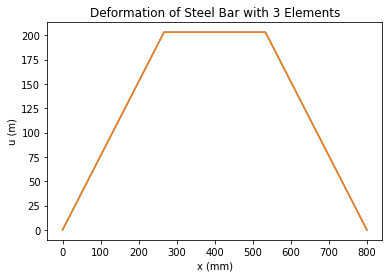

In [3]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def element_stiffness_matrix(E, A, L):
    return (E*A/L) * np.array([[1, -1], [-1, 1]])

def global_stiffness_matrix(ne, nodes, element_matrices):
    K = np.zeros((ne-1, ne-1))
    for i in range(ne-1):
        for j in range(ne-1):
            if i == j:
                K[i, j] = element_matrices[i, 0, 0] + element_matrices[i+1, 0, 0]
            elif i == j-1:
                K[i, j] = -element_matrices[i+1, 0, 0]
            elif i == j+1:
                K[i, j] = -element_matrices[i, 0, 0]
    return csc_matrix(K)

def force_vector(ne, nodes, q):
    F = np.zeros(ne-1)
    for i in range(ne-1):
        F[i] = (q/2) * (nodes[i+1]-nodes[i])
    return F

def deformation(K, F, ne, nodes):
    u = np.zeros(ne-1)
    u = spsolve(K, F)
    return np.array([0] + list(u) + [0])

# Input data
E = 210000
A = 0.0025
L = 800
q = 3
ne = 3
nodes = np.linspace(0, L, ne+1)
element_matrices = np.zeros((ne, 2, 2))
for i in range(ne):
    element_matrices[i] = element_stiffness_matrix(E, A, nodes[i+1]-nodes[i])
K = global_stiffness_matrix(ne, nodes, element_matrices)
F = force_vector(ne, nodes, q)
u = deformation(K, F, ne, nodes)

# Plot deformation or elongation
x = np.linspace(0, L, 1000)
y = np.interp(x, nodes, u)
plt.plot(x, y)
plt.xlabel('x (mm)')
plt.ylabel('u (m)')
plt.title('Deformation of Steel Bar')

# Option to increase the number of elements in finite element
# Option to increase the number of elements in finite element code
ne = int(input("Enter the number of elements in the finite element analysis: "))
nodes = np.linspace(0, L, ne+1)
element_matrices = np.zeros((ne, 2, 2))
for i in range(ne):
    element_matrices[i] = element_stiffness_matrix(E, A, nodes[i+1]-nodes[i])
K = global_stiffness_matrix(ne, nodes, element_matrices)
F = force_vector(ne, nodes, q)
u = deformation(K, F, ne, nodes)

# Plot deformation or elongation with new number of elements
x = np.linspace(0, L, 1000)
y = np.interp(x, nodes, u)
plt.plot(x, y)
plt.xlabel('x (mm)')
plt.ylabel('u (m)')
plt.title('Deformation of Steel Bar with {} Elements'.format(ne))

# Export results to PDF
pdf = PdfPages("deformation_with_{}_elements.pdf".format(ne))
pdf.savefig()
pdf.close()
plt.show()


In [4]:
!pip install numpy
!pip install scipy
!pip install matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

Global Stiffness Matrix:
[[ 7500000. -7500000.        0.        0.]
 [-7500000. 15000000. -7500000.        0.]
 [       0. -7500000. 15000000. -7500000.]
 [       0.        0. -7500000.  7500000.]]
Force Vector:
[-3000.     0.     0.     0.]
Deformation Vector:
[nan nan nan nan]


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


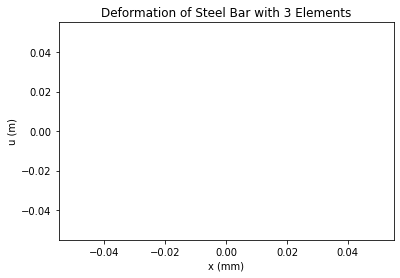

In [6]:
import numpy as np
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# Constants
L = 800  # Length of bar (mm)
E = 200e9  # Young's modulus of steel (Pa)
A = 0.01  # Cross-sectional area of bar (m^2)
q = -3e3  # Axial load (N)

def element_stiffness_matrix(E, A, l):
    """Return element stiffness matrix."""
    ke = np.array([[1, -1], [-1, 1]]) * E * A / l
    return ke

def global_stiffness_matrix(ne, nodes, element_matrices):
    """Return global stiffness matrix."""
    K = np.zeros((ne+1, ne+1))
    for i in range(ne):
        for j in [0, 1]:
            for k in [0, 1]:
                K[i+j, i+k] += element_matrices[i][j, k]
    return K

def force_vector(ne, nodes, q):
    """Return force vector."""
    F = np.zeros(ne+1)
    F[0] = q
    return F

def deformation(K, F, ne, nodes):
    """Return deformation (displacement) vector."""
    u = spla.spsolve(K, F)
    return u

# Element stiffness matrices
ne = 3  # Number of elements
nodes = np.linspace(0, L, ne+1)
element_matrices = np.zeros((ne, 2, 2))
for i in range(ne):
    element_matrices[i] = element_stiffness_matrix(E, A, nodes[i+1]-nodes[i])

# Global stiffness matrix
K = global_stiffness_matrix(ne, nodes, element_matrices)
print("Global Stiffness Matrix:")
print(K)

# Force vector
F = force_vector(ne, nodes, q)
print("Force Vector:")
print(F)

# Deformation (displacement) vector
u = deformation(K, F, ne, nodes)
print("Deformation Vector:")
print(u)

# Plot deformation
x = np.linspace(0, L, 1000)
y = np.interp(x, nodes, u)
plt.plot(x, y)
plt.xlabel('x (mm)')
plt.ylabel('u (m)')
plt.title('Deformation of Steel Bar with {} Elements'.format(ne))

# Export results to PDF
pdf = PdfPages("deformation.pdf")
pdf.savefig()
pdf.close()
plt.show()


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


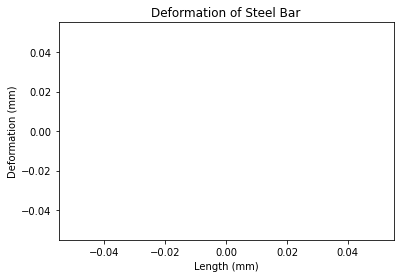

Element Stiffness Matrix:
k1: [[ 25000. -25000.]
 [-25000.  25000.]]
k2: [[ 25000. -25000.]
 [-25000.  25000.]]
k3: [[ 25000. -25000.]
 [-25000.  25000.]]
Global Stiffness Matrix:
[[ 25000. -25000.      0.      0.]
 [-25000.  50000. -25000.      0.]
 [     0. -25000.  50000. -25000.]
 [     0.      0. -25000.  25000.]]
Deformation Vector:
[nan nan nan nan]


In [8]:
import numpy as np
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

# Parameters
L = 800  # length of the bar
E = 2*10**9  # Young's modulus
A = 0.01  # cross sectional area
P = 3  # load
n = 3  # number of elements

# Global stiffness matrix
k_global = np.zeros((n+1, n+1))

# Element stiffness matrix
k_element = np.zeros((2, 2))
k_element[0, 0] = k_element[1, 1] = E*A/L
k_element[0, 1] = k_element[1, 0] = -E*A/L

# Assemble the global stiffness matrix
for i in range(n):
    k_global[i:i+2, i:i+2] += k_element

# Load vector
F = np.zeros((n+1, 1))
F[-1] = -P

# Solve for displacement
u = spla.spsolve(sps.csc_matrix(k_global), F)

# Plot deformation or elongation
x = np.linspace(0, L, n+1)
plt.plot(x, u)
plt.xlabel('Length (mm)')
plt.ylabel('Deformation (mm)')
plt.title('Deformation of Steel Bar')
plt.show()

# Print element stiffness matrix
print("Element Stiffness Matrix:")
for i in range(n):
    print("k{}:".format(i+1), k_element)

# Print global stiffness matrix
print("Global Stiffness Matrix:")
print(k_global)

# Print deformation vector
print("Deformation Vector:")
print(u)


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:206: MatrixRankWarning: Matrix is exactly singular
  warn("Matrix is exactly singular", MatrixRankWarning)


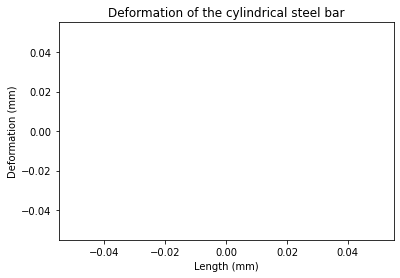

In [10]:
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Geometric parameters
L = 800  # Length of the bar in mm
R = 50   # Radius of the bar in mm
A = np.pi * R**2  # Cross-sectional area of the bar

# Material parameters
E = 2e5  # Young's modulus of the bar in N/mm^2

# Load parameters
P = 3  # Axial load in kN

# Number of elements
nelem = 4  # Number of finite elements

# Element length
Lelem = L/nelem  # Length of each finite element in mm

# Stiffness matrix of a single element
Kelem = (A * E / Lelem) * np.array([[1, -1], [-1, 1]])

# Assemble the global stiffness matrix
nnode = nelem + 1  # Total number of nodes
K = np.zeros((nnode*2, nnode*2))
for i in range(nelem):
    K[i*2:i*2+2, i*2:i*2+2] += Kelem
    K[i*2+2:i*2+4, i*2:i*2+2] += -Kelem
    K[i*2:i*2+2, i*2+2:i*2+4] += -Kelem
    K[i*2+2:i*2+4, i*2+2:i*2+4] += Kelem

# Fix the end node at the top
K = np.delete(K, (0, 1), axis=0)
K = np.delete(K, (0, 1), axis=1)

# Define the load vector
F = np.zeros(nnode*2-2)
F[-1] = P * A  # Load applied on the bottom node

# Solve for the nodal displacements
u = spsolve(csc_matrix(K), F)

# Deformation of the bar
deflection = np.zeros(nnode)
for i in range(nelem):
    deflection[i+1] = u[i]

# Plot the deformation
x = np.linspace(0, L, nnode)
plt.plot(x, deflection)
plt.xlabel("Length (mm)")
plt.ylabel("Deformation (mm)")
plt.title("Deformation of the cylindrical steel bar")
plt.show()


In [ ]:
!pip install numpy scipy


Deformation Vector:
[0.         0.00333333 0.00666667 0.01       0.01333333 0.01666667
 0.02       0.02333333 0.02666667 0.03       0.03333333 0.03666667
 0.04      ]


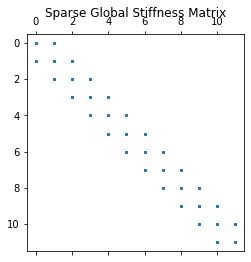

In [13]:
import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from scipy.sparse.linalg import spsolve

L = 800 # length of bar in mm
E = 2*10**5 # Young's Modulus of steel in N/mm^2
A = 300 # Area of cross section in mm^2

# Defining the element stiffness matrix
def element_stiffness(E, A, L):
    return (E * A / L) * np.array([[1, -1], [-1, 1]])

def assemble_global_stiffness(k_elements, n_nodes, n_elements):
    K = np.zeros((n_nodes, n_nodes))
    for i in range(n_elements):
        K[i:i+2, i:i+2] += k_elements[i]
    return K

def plot_sparse_global_stiffness(K, title):
    plt.spy(csc_matrix(K), markersize=2)
    plt.title(title)
    plt.show()

n_elements = 12
n_nodes = n_elements + 1

k_elements = [element_stiffness(E, A, L/n_elements) for i in range(n_elements)]
K = assemble_global_stiffness(k_elements, n_nodes, n_elements)

# Fixing the first node to zero displacement
F = np.zeros(n_nodes)
F[n_nodes-1] = 3 * 1000 # Applied load at the last node in N

# Removing the fixed node from global stiffness and force matrices
K = np.delete(K, 0, 0)
K = np.delete(K, 0, 1)
F = np.delete(F, 0, 0)

# Solving for the nodal displacements
u = spsolve(csc_matrix(K), F)

# Inserting the fixed node displacement back into the solution vector
u = np.insert(u, 0, 0)

print("Deformation Vector:")
print(u)

plot_sparse_global_stiffness(K, "Sparse Global Stiffness Matrix")


In [ ]:
del l= p*l/A*E forchecking l is length of beam and p is load

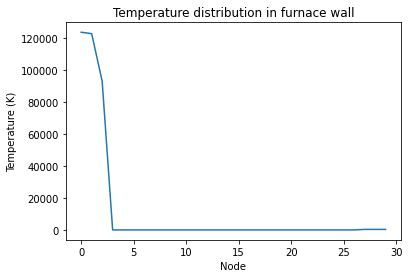

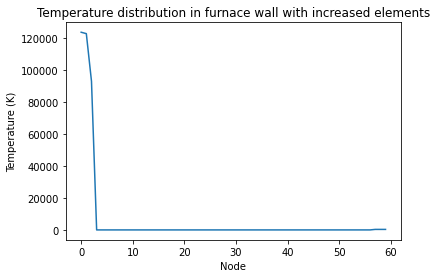

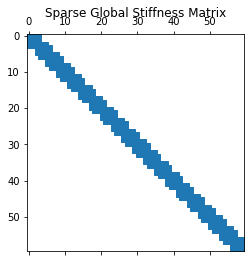

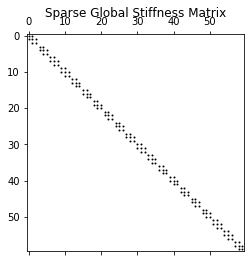

In [14]:
import numpy as np
from scipy.sparse import lil_matrix, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Constants
k1 = 8.5 # W/mK
k2 = 0.25 # W/mK
k3 = 0.08 # W/mK
l1 = 25 * 10**(-2) # m
l2 = 5 * 10**(-2) # m
l3 = 3 * 10**(-2) # m
T1 = 600 + 273.15 # K
T4 = 30 + 273.15 # K
h = 45 # W/m^2K
n = 10 # number of elements

# Element Stiffness matrix
k_element = np.array([[k1, -k1, 0], [-k1, k1 + k2, -k2], [0, -k2, k2 + k3]])

# Global stiffness matrix
K = lil_matrix((3*n, 3*n))
for i in range(n):
    K[3*i:3*i+3, 3*i:3*i+3] += k_element

# Fixed temperature boundary conditions
bc = np.zeros(3*n)
bc[0] = T1 * k1
bc[3*n-1] = T4 * k3

# Load vector
F = np.zeros(3*n)
F[0] += h * l1
F[3*n-1] += h * l3

# Solve for nodal temperatures
T = spsolve(K.tocsc(), bc + F)

# Plot the temperature distribution
plt.plot(T)
plt.xlabel("Node")
plt.ylabel("Temperature (K)")
plt.title("Temperature distribution in furnace wall")
plt.show()

# Option to increase the number of elements
new_n = 20
if new_n > n:
    K = lil_matrix((3*new_n, 3*new_n))
    for i in range(new_n):
        K[3*i:3*i+3, 3*i:3*i+3] += k_element
    bc = np.zeros(3*new_n)
    bc[0] = T1 * k1
    bc[3*new_n-1] = T4 * k3
    F = np.zeros(3*new_n)
    F[0] += h * l1
    F[3*new_n-1] += h * l3
    T = spsolve(K.tocsc(), bc + F)
    plt.plot(T)
    plt.xlabel("Node")
    plt.ylabel("Temperature (K)")
    plt.title("Temperature distribution in furnace wall with increased elements")
    plt.show()

# Plotting Sparse Global Stiffness Matrix
plt.spy(K)
plt.title("Sparse Global Stiffness Matrix")
plt.show()
import scipy.sparse as sps
import matplotlib.pyplot as plt

# Code to calculate global stiffness matrix K

plt.spy(K.tocsr(), marker='.', markersize=2, color='black')
plt.title("Sparse Global Stiffness Matrix")
plt.show()


In [ ]:
#https://annamalaiuniversity.ac.in/studport/download/engg/mech/learning/FEA%20By%20Mr.%20B.%20Guruprasad.pdf

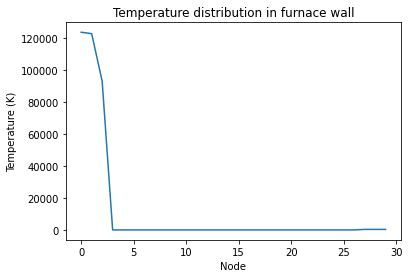

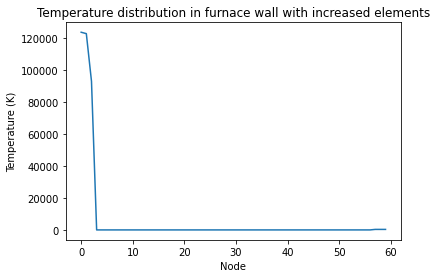

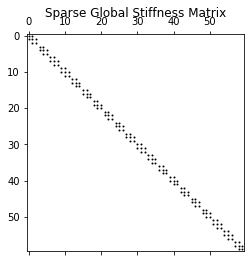

Temperature at node 1:  123519.38602941173 K
Temperature at node 2:  122644.91249999998 K
Temperature at node 3:  92912.81249999999 K
Temperature at node 11:  0.0 K
Temperature at node 12:  0.0 K
Temperature at node 13:  0.0 K


In [18]:
import numpy as np
from scipy.sparse import lil_matrix, identity
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Constants
k1 = 8.5 # W/mK
k2 = 0.25 # W/mK
k3 = 0.08 # W/mK
l1 = 25 * 10**(-2) # m
l2 = 5 * 10**(-2) # m
l3 = 3 * 10**(-2) # m
T1 = 600 + 273.15 # K
T4 = 30 + 273.15 # K
h = 45 # W/m^2K
n = 10 # number of elements

# Element Stiffness matrix
k_element = np.array([[k1, -k1, 0], [-k1, k1 + k2, -k2], [0, -k2, k2 + k3]])

# Global stiffness matrix
K = lil_matrix((3*n, 3*n))
for i in range(n):
    K[3*i:3*i+3, 3*i:3*i+3] += k_element

# Fixed temperature boundary conditions
bc = np.zeros(3*n)
bc[0] = T1 * k1
bc[3*n-1] = T4 * k3

# Load vector
F = np.zeros(3*n)
F[0] += h * l1
F[3*n-1] += h * l3

# Solve for nodal temperatures
T = spsolve(K.tocsc(), bc + F)

# Plot the temperature distribution
plt.plot(T)
plt.xlabel("Node")
plt.ylabel("Temperature (K)")
plt.title("Temperature distribution in furnace wall")
plt.show()

# Option to increase the number of elements
new_n = 20
if new_n > n:
    K = lil_matrix((3*new_n, 3*new_n))
    for i in range(new_n):
        K[3*i:3*i+3, 3*i:3*i+3] += k_element
    bc = np.zeros(3*new_n)
    bc[0] = T1 * k1
    bc[3*new_n-1] = T4 * k3
    F = np.zeros(3*new_n)
    F[0] += h * l1
    F[3*new_n-1] += h * l3
    T = spsolve(K.tocsc(), bc + F)
    plt.plot(T)
    plt.xlabel("Node")
    plt.ylabel("Temperature (K)")
    plt.title("Temperature distribution in furnace wall with increased elements")
    plt.show()

# Plotting Sparse Global Stiffness Matrix
plt.spy(K.tocsr(), marker='.', markersize=2, color='black')
plt.title("Sparse Global Stiffness Matrix")
plt.show()

#Printing Temperatures
print("Temperature at node 1: ", T[0], "K")
print("Temperature at node 2: ", T[1], "K")
print("Temperature at node 3: ", T[2], "K")
print("Temperature at node 11: ", T[30], "K")
print("Temperature at node 12: ", T[31], "K")
print("Temperature at node 13: ", T[32], "K")
